In [60]:
!pip install pandas numpy matplotlib seaborn plotly openpyxl --quiet

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files
import io

In [62]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

In [63]:
print("Please upload your Netflix dataset (.csv or .xlsx)")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

Please upload your Netflix dataset (.csv or .xlsx)


Saving Netflix Dataset (1).csv to Netflix Dataset (1) (2).csv


In [64]:
if file_name.endswith('.xlsx') or file_name.endswith('.xls'):
    df = pd.read_excel(io.BytesIO(uploaded[file_name]))
else:
    df = pd.read_csv(io.BytesIO(uploaded[file_name]))


In [65]:
print(f"\n✅ Dataset Loaded Successfully! Shape: {df.shape}")
display(df.head())


✅ Dataset Loaded Successfully! Shape: (7789, 11)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [66]:
if 'Release_Date' in df.columns:
    df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
    df['year'] = df['Release_Date'].dt.year
else:
    print("⚠️ 'Release_Date' not found. Cannot create 'year'.")

In [67]:
if 'Type' in df.columns:
    df['main_genre'] = df['Type'].apply(lambda x: str(x).split(",")[0].strip() if pd.notnull(x) else "Unknown")
else:
    print("⚠️ 'Type' column not found. Cannot create 'main_genre'.")

In [68]:
cols_to_check = [col for col in ['year', 'main_genre'] if col in df.columns]
df = df.dropna(subset=cols_to_check)
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['main_genre'] = df['main_genre'].astype(str)

In [69]:
print("✅ Data prepared! Remaining rows:", len(df))

✅ Data prepared! Remaining rows: 7691


/tmp/ipython-input-91242453.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




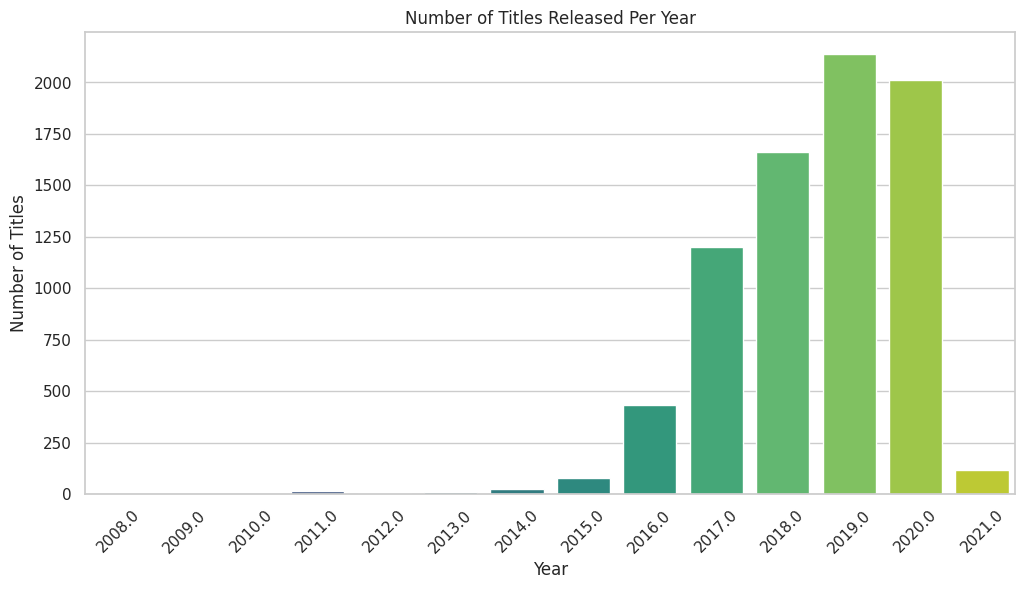

In [70]:
if 'year' in df.columns:
    plt.figure(figsize=(12,6))
    sns.countplot(x='year', data=df, palette="viridis")
    plt.title("Number of Titles Released Per Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Titles")
    plt.xticks(rotation=45)
    plt.show()

/tmp/ipython-input-882631531.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




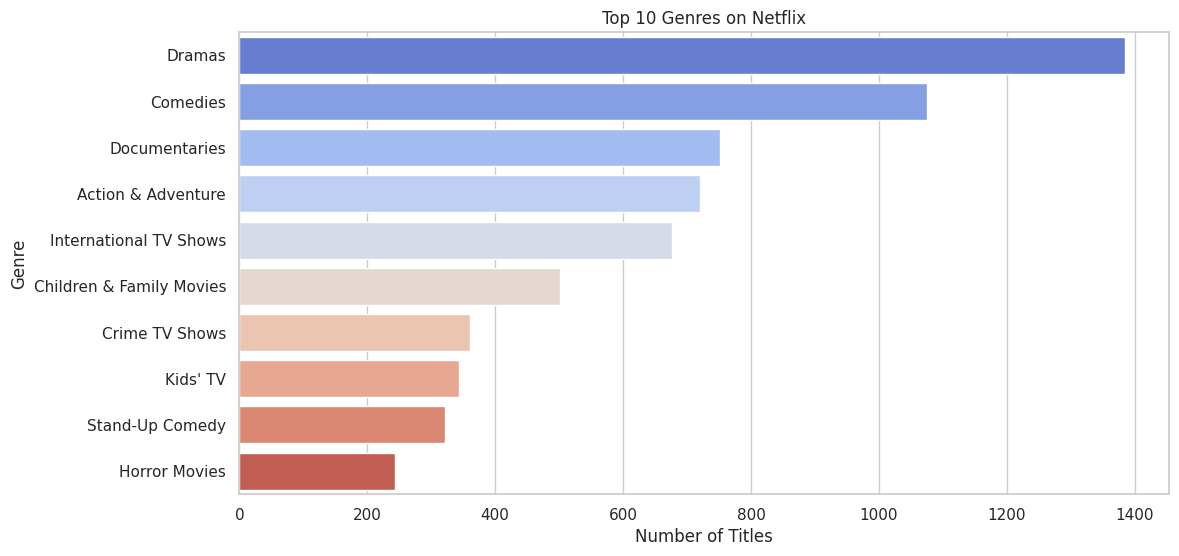

In [71]:
if 'main_genre' in df.columns:
    top_genres = df['main_genre'].value_counts().head(10)
    plt.figure(figsize=(12,6))
    sns.barplot(x=top_genres.values, y=top_genres.index, palette="coolwarm")
    plt.title("Top 10 Genres on Netflix")
    plt.xlabel("Number of Titles")
    plt.ylabel("Genre")
    plt.show()

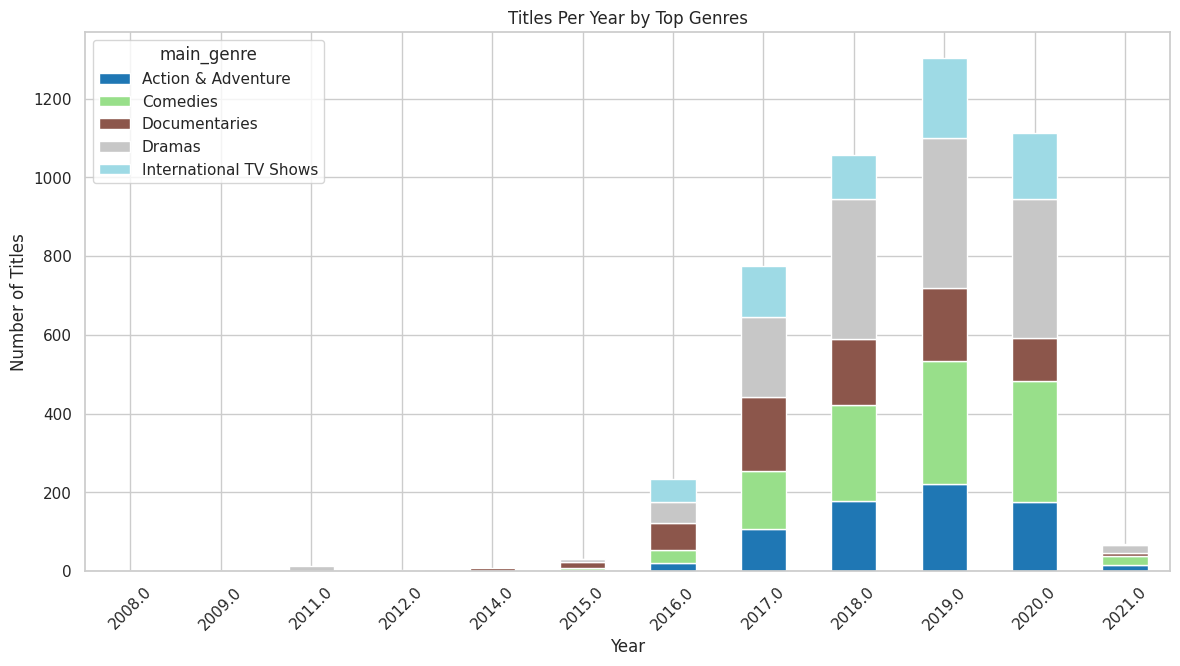

In [72]:
if 'year' in df.columns and 'main_genre' in df.columns:
    popular_genres = df['main_genre'].value_counts().head(5).index
    subset = df[df['main_genre'].isin(popular_genres)]
    year_genre_counts = subset.groupby(['year','main_genre']).size().unstack(fill_value=0)
    if not year_genre_counts.empty:
        year_genre_counts.plot(kind='bar', stacked=True, figsize=(14,7), colormap="tab20")
        plt.title("Titles Per Year by Top Genres")
        plt.xlabel("Year")
        plt.ylabel("Number of Titles")
        plt.xticks(rotation=45)
        plt.show()

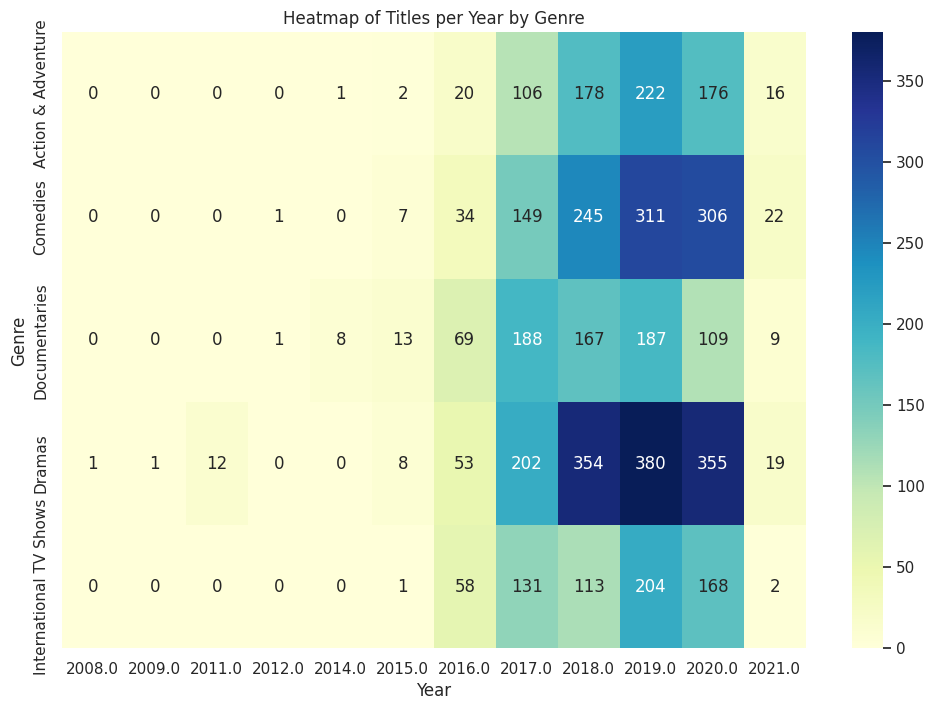

In [73]:
if 'year' in df.columns and 'main_genre' in df.columns and not year_genre_counts.empty:
    plt.figure(figsize=(12,8))
    sns.heatmap(year_genre_counts.T, cmap="YlGnBu", annot=True, fmt="d")
    plt.title("Heatmap of Titles per Year by Genre")
    plt.xlabel("Year")
    plt.ylabel("Genre")
    plt.show()

In [74]:
if 'year' in df.columns and 'main_genre' in df.columns:
    fig = px.bar(subset, x='year', color='main_genre', barmode='group',
                 title="Interactive View: Titles by Year and Genre")
    fig.show()

In [75]:
print("\n✅ Netflix Dataset Analysis Completed!")


✅ Netflix Dataset Analysis Completed!
